---
---

# **IMPORTING AND INSTALLING THE WORKING LIBRARIES**

In [27]:
import warnings

In [28]:
warnings.filterwarnings('ignore')

In [166]:
!pip install ipywidgets

In [167]:
import pandas as pd

In [173]:
import numpy as np

In [169]:
import seaborn as sns

In [177]:
import json

In [170]:
import matplotlib.pyplot as plt

In [178]:
import ipywidgets as widgets

In [179]:
from ipywidgets import interactive

In [168]:
from sklearn.preprocessing import StandardScaler

In [171]:
from sklearn.neighbors import NearestNeighbors

In [172]:
from sklearn.preprocessing import StandardScaler

In [174]:
from sklearn.decomposition import TruncatedSVD

In [175]:
from sklearn.preprocessing import StandardScaler

In [176]:
from sklearn.metrics import precision_score, recall_score, f1_score

---
---

---
---

# **LOADING THE WORKING DATASET**

In [30]:
# Load the dataset

In [31]:
dataset_path = "/content/tracks.csv"

In [32]:
df = pd.read_csv(dataset_path)

----
----

---
---

# **INSPECTING THE DATASET**

In [33]:
# Print the basic description of the dataset

In [34]:
print("Dataset Description:")
print(df.describe(include='all'))  # Include all types of columns

Dataset Description:
                            id        name     popularity   duration_ms  \
count                   586672      586601  586672.000000  5.866720e+05   
unique                  586672      446474            NaN           NaN   
top     35iwgR4jXetI318WEWsa1Q  Summertime            NaN           NaN   
freq                         1         101            NaN           NaN   
mean                       NaN         NaN      27.570053  2.300512e+05   
std                        NaN         NaN      18.370642  1.265261e+05   
min                        NaN         NaN       0.000000  3.344000e+03   
25%                        NaN         NaN      13.000000  1.750930e+05   
50%                        NaN         NaN      27.000000  2.148930e+05   
75%                        NaN         NaN      41.000000  2.638670e+05   
max                        NaN         NaN     100.000000  5.621218e+06   

             explicit           artists                  id_artists  \
count  

In [35]:
# Print the info of the dataset

In [36]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liven

In [37]:
# Print the first few rows of the dataset

In [38]:
print("\nDataset Head:")
print(df.head())


Dataset Head:
                       id                                 name  popularity  \
0  35iwgR4jXetI318WEWsa1Q                                Carve           6   
1  021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista           0   
2  07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado           0   
3  08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado           0   
4  08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening           0   

   duration_ms  explicit              artists                  id_artists  \
0       126903         0              ['Uli']  ['45tIt06XoI0Iio4LBEVpls']   
1        98200         0  ['Fernando Pessoa']  ['14jtPCOoNZwquk5wd9DxrY']   
2       181640         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
3       176907         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
4       163080         0      ['Dick Haymes']  ['3BiJGZsyX9sJchTqcSA7Su']   

  release_date  danceability  energy  key  loudness  

In [39]:
# Check for missing values

In [40]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64


In [41]:
# Check for duplicate rows

In [42]:
duplicates = df.duplicated()

In [43]:
print("\nDuplicate Rows:")
print(f"Number of duplicate rows: {duplicates.sum()}")


Duplicate Rows:
Number of duplicate rows: 0


---
---

# **DATA PREPROCESSING**

In [44]:
# Identify numerical and categorical features

In [45]:
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns


In [46]:
categorical_features = df.select_dtypes(include=['object', 'category']).columns


In [ ]:
# Handle missing values

In [47]:
# For numerical features: fill with median

In [48]:
df[numerical_features] = df[numerical_features].apply(lambda x: x.fillna(x.median()))


In [49]:
# For categorical features: fill with mode

In [50]:
df[categorical_features] = df[categorical_features].apply(lambda x: x.fillna(x.mode()[0]))


In [51]:
# Normalize selected numerical features

In [52]:
features_to_normalize = ['danceability', 'energy']  # Add more features if needed


In [53]:
scaler = StandardScaler()

In [54]:
df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])


In [55]:
# Save the preprocessed data to a new CSV file

In [56]:
preprocessed_path = "/content/tracks_preprocessed.csv"

In [57]:
df.to_csv(preprocessed_path, index=False)

In [58]:
print(f"Preprocessed data saved to: {preprocessed_path}")

Preprocessed data saved to: /content/tracks_preprocessed.csv


---
---

---
---

# **EXPLORATORY DATA ANALYSIS (EDA)**

In [59]:
# Load the preprocessed dataset

In [60]:
data_path = "/content/tracks_preprocessed.csv"

In [61]:
df = pd.read_csv(data_path)

In [62]:
# Set up the plotting style

In [63]:
sns.set(style="whitegrid")

In [64]:
# Feature Distributions (Boxplots)

In [65]:
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns


In [66]:
# Boxplots for numerical features

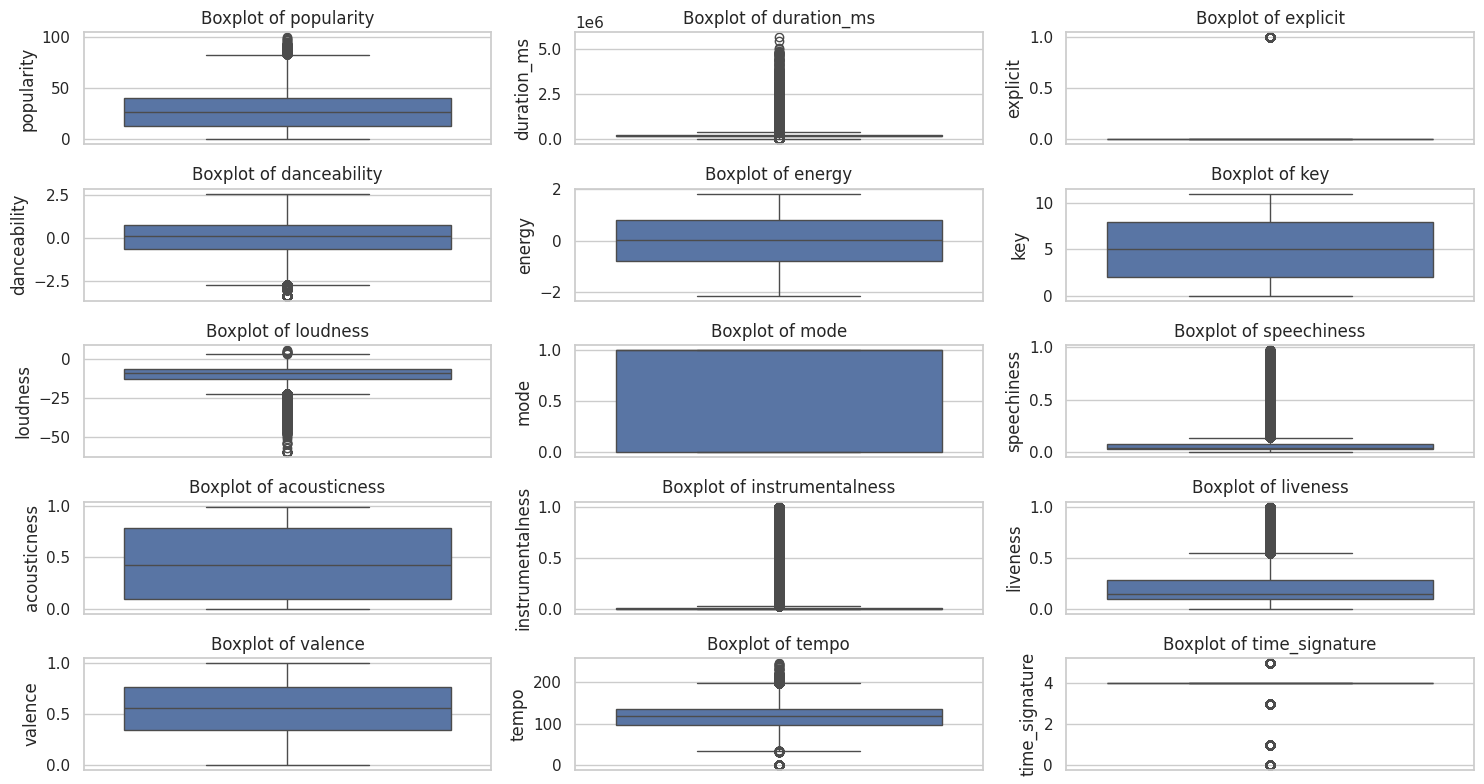

In [181]:
plt.figure(figsize=(15, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot((len(numerical_features) + 2) // 3, 3, i)
    sns.boxplot(y=df[feature])
    plt.title(f"Boxplot of {feature}")
    plt.tight_layout()
plt.savefig('boxplots_output.pdf')
plt.show()

In [68]:
# Correlation Heatmap

In [69]:
# Compute the correlation matrix for numerical features

In [70]:
correlation_matrix = df[numerical_features].corr()

In [71]:
# Plot the heatmap

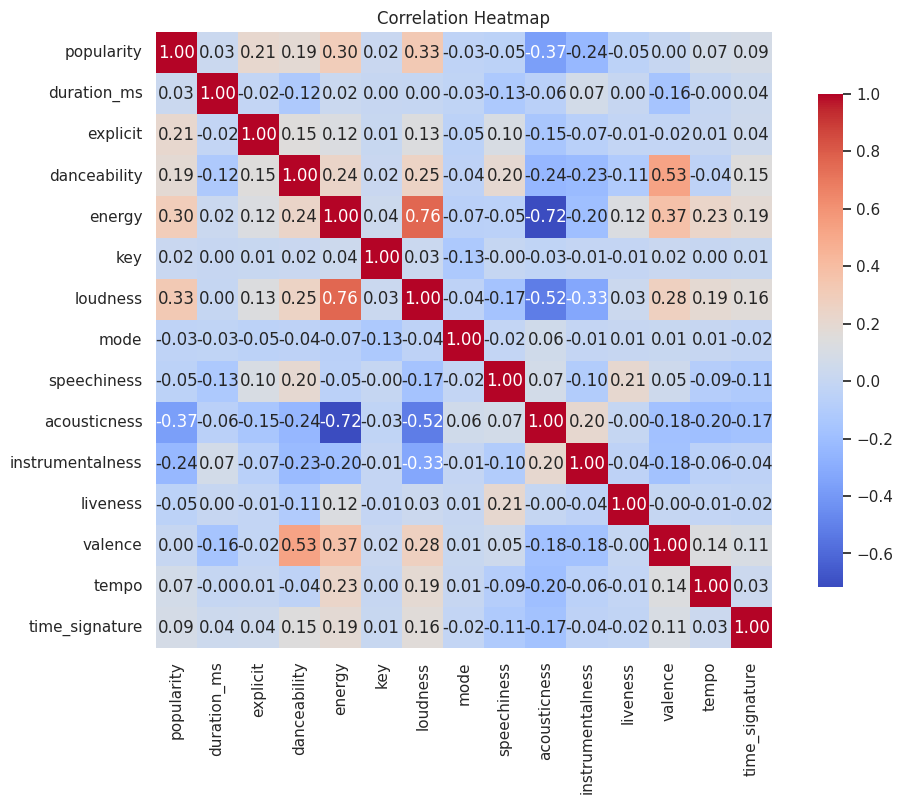

In [182]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Heatmap")
plt.savefig('correlation_heatmap_output.pdf')
plt.show()

---
---

---
---

# **IMPLEMENTING KNN RECOMMENDATION**

In [ ]:
# Step 1: Locate a song's index using its ID

In [ ]:
song_id = '35iwgR4jXetI318WEWsa1Q'  # Replace with the actual track ID from the dataset


In [ ]:
song_index = df[df['id'] == song_id].index[0]

In [74]:
# Step 2: Fit the kNN model with normalized features (danceability, energy, etc.)


In [73]:
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']


In [75]:
X = df[features]

In [76]:
# Normalize the features using StandardScaler

In [77]:
scaler = StandardScaler()

In [78]:
X_scaled = scaler.fit_transform(X)

In [79]:
# Fit the kNN model

In [80]:
knn = NearestNeighbors(n_neighbors=5, algorithm='auto', metric='euclidean')


In [81]:
knn.fit(X_scaled)

NearestNeighbors(metric='euclidean')

In [82]:
# Step 3: Find the k nearest songs to recommend based on the song's index

In [83]:
distances, indices = knn.kneighbors([X_scaled[song_index]], n_neighbors=6)  # 6 because it includes the song itself


In [84]:
# Display recommended songs

In [85]:
recommended_songs = df.iloc[indices[0][1:]]  # Exclude the first one, which is the song itself


In [86]:
print(recommended_songs[['id', 'name']])

                            id  \
159569  6DrfgEcuwLAQK8tldcQbzq   
505573  7hIG0j57IsVwGLV5yHqkiD   
548576  3RYLHcwIiNIcowTQCmTlq7   
408086  7njjwVXioi8dMjfJgkhcZD   
395145  4dTStKxAU1KLRhDfshXjyX   

                                                     name  
159569  Looky Looky Yonder / Black Betty / Yella Woman...  
505573                                   Future Primitive  
548576                           ピクニック (2019 Remastering)  
408086                           ピクニック (2019 Remastering)  
395145                              Ciao Ciao (feat. Kaos  


In [87]:
# Example: Experiment with a different song ID

In [88]:
# Step 1: Select features for fitting kNN (using normalized features like danceability and energy)


In [89]:
features = ['danceability', 'energy']  # You can expand this list as needed


In [93]:
# Prepare the feature data for training

In [91]:
X = df[features].values  # Ensure we're using values to pass to the model

In [92]:
# Step 2: Fit kNN model with feature names (after normalizing)

In [94]:
knn = NearestNeighbors(n_neighbors=5)

In [95]:
knn.fit(X)

NearestNeighbors()

In [96]:
# Step 2: Fit the kNN model with the normalized features

In [97]:
knn = NearestNeighbors(n_neighbors=5, metric='cosine')  # You can adjust the number of neighbors as needed


In [98]:
knn.fit(X)

NearestNeighbors(metric='cosine')

In [99]:
# Step 3: Use the model to find the nearest neighbors

In [101]:
song_id = '6DrfgEcuwLAQK8tldcQbzq'  # Example song ID

In [100]:
song_index = df[df['id'] == song_id].index[0]

In [ ]:
# Get the feature values for the selected song

In [ ]:
song_features = df.loc[song_index, features].values.reshape(1, -1)

In [102]:
# Find the k nearest neighbors

In [103]:
distances, indices = knn.kneighbors(song_features)

In [104]:
# Retrieve the recommended songs based on the indices

In [105]:
recommended_songs = df.iloc[indices[0]]

In [106]:
# Display the recommended songs

In [107]:
print("Recommended songs based on the selected song:")
print(recommended_songs[['id', 'name']])

Recommended songs based on the selected song:
                            id  \
159569  6DrfgEcuwLAQK8tldcQbzq   
98512   2gmy7oUpr15VHcAlqx3293   
335290  1N1lJFDcsYm6gd6OYqomgF   
36719   3emp8E5OAwAWpWd2l8GNPV   
4119    100N1QtqbAemzXCv3feqzs   

                                                     name  
159569  Looky Looky Yonder / Black Betty / Yella Woman...  
98512                                             Could I  
335290                                  แผลที่ไม่มีวันหาย  
36719                                             Cowpoke  
4119                La Hija de Japonesita - Remasterizado  


---
---

---
---

# **COLLABORATIVE FILTERING**

In [108]:
# Assuming 'df' is the dataframe with song data
# Creating a dummy user-item interaction matrix for testing
# Example: Dummy ratings or play counts (1-5 scale, replace with actual data)


In [109]:
# Create a small user-song interaction matrix for testing (replace this with your actual data)


In [110]:
user_song_data = {
    'user_id': [1, 1, 2, 2, 3, 3],
    'song_id': ['6DrfgEcuwLAQK8tldcQbzq', '2rYLAODyTki4N9U3jwF9yX', '2gepbx8rSBH41O1Z7Y9wkk', '457VjWhDFQNnK9sSaXTIhn', '4LyjQQqOxikZzYK0YCpaeR', '2rYLAODyTki4N9U3jwF9yX'],
    'rating': [5, 4, 5, 3, 4, 2]
}

In [111]:
user_song_df = pd.DataFrame(user_song_data)

In [112]:
# Creating the user-item interaction matrix (ratings matrix)

In [113]:
interaction_matrix = user_song_df.pivot(index='user_id', columns='song_id', values='rating').fillna(0)


In [114]:
# Normalize the interaction matrix (StandardScaler)

In [115]:
scaler = StandardScaler()

In [116]:
interaction_matrix_normalized = pd.DataFrame(scaler.fit_transform(interaction_matrix), columns=interaction_matrix.columns)


In [117]:
# Apply TruncatedSVD for matrix factorization

In [118]:
svd = TruncatedSVD(n_components=2)  # Set the number of latent factors

In [119]:
svd_matrix = svd.fit_transform(interaction_matrix_normalized)

In [120]:
# Reconstruct the original matrix from the latent factors

In [121]:
reconstructed_matrix = np.dot(svd_matrix, svd.components_)

In [122]:
# Convert the reconstructed matrix back to a DataFrame

In [123]:
reconstructed_df = pd.DataFrame(reconstructed_matrix, columns=interaction_matrix.columns)


In [124]:
# Define a function to recommend top-N songs for a user based on reconstructed matrix


In [125]:
def recommend_songs(user_id, top_n=5):
    user_index = user_id - 1  # Indexing starts from 0, so subtract 1
    user_scores = reconstructed_df.iloc[user_index]

    # Combine scores with song names for better understanding
    song_names = df[df['id'].isin(user_scores.index)][['id', 'name']].set_index('id')

    # Get top-N recommendations
    recommended_songs = user_scores.sort_values(ascending=False).head(top_n)
    recommended_songs_with_names = recommended_songs.index.to_series().map(song_names['name'])

    # Return top-N song names with their predicted scores
    return pd.DataFrame({
        'song_name': recommended_songs_with_names,
        'predicted_score': recommended_songs.values
    })

In [126]:
# Test the recommendation for user 1 again

In [127]:
recommended_songs = recommend_songs(1, top_n=3)

In [128]:
print("Recommended songs for User 1:")
print(recommended_songs)

Recommended songs for User 1:
                                                                song_name  \
song_id                                                                     
6DrfgEcuwLAQK8tldcQbzq  Looky Looky Yonder / Black Betty / Yella Woman...   
2rYLAODyTki4N9U3jwF9yX                       Take The L Train (To 8 Ave.)   
4LyjQQqOxikZzYK0YCpaeR                                   A Thousand Years   

                        predicted_score  
song_id                                  
6DrfgEcuwLAQK8tldcQbzq         1.414214  
2rYLAODyTki4N9U3jwF9yX         1.224745  
4LyjQQqOxikZzYK0YCpaeR        -0.707107  


---
---

---
---

# **EVALUATION METRICS**

In [129]:
def evaluate_recommendations(recommended_songs, relevant_songs, k=10):
    """
    Evaluate the recommendations using precision, recall, F1 score, and NDCG.

    :param recommended_songs: A list of recommended song IDs.
    :param relevant_songs: A list of relevant/liked song IDs.
    :param k: Number of recommendations to consider for precision/recall (default 10).

    :return: Dictionary with precision, recall, f1_score, ndcg.
    """
    # Ensure only top k recommendations are considered
    recommended_top_k = recommended_songs[:k]

    # Precision
    precision = precision_score(np.isin(recommended_top_k, relevant_songs), np.ones(len(recommended_top_k)))

    # Recall
    recall = recall_score(np.isin(recommended_top_k, relevant_songs), np.ones(len(recommended_top_k)))

    # F1 Score
    f1 = f1_score(np.isin(recommended_top_k, relevant_songs), np.ones(len(recommended_top_k)))

    # NDCG (Normalized Discounted Cumulative Gain)
    dcg = np.sum([1 / np.log2(i + 2) for i in range(k) if recommended_top_k[i] in relevant_songs])
    idcg = np.sum([1 / np.log2(i + 2) for i in range(min(k, len(relevant_songs)))])
    ndcg = dcg / idcg if idcg > 0 else 0

    return {'precision': precision, 'recall': recall, 'f1_score': f1, 'ndcg': ndcg}


In [130]:
# Example of relevant songs (user likes these songs)

In [131]:
relevant_songs = ['6DrfgEcuwLAQK8tldcQbzq', '2rYLAODyTki4N9U3jwF9yX']

In [132]:
# Example of recommended songs (from the recommendation system)

In [133]:
recommended_songs = ['6DrfgEcuwLAQK8tldcQbzq', '2rYLAODyTki4N9U3jwF9yX', '457VjWhDFQNnK9sSaXTIhn']


In [134]:
# Evaluate the recommendations for the top 3 songs

In [135]:
evaluation_metrics = evaluate_recommendations(recommended_songs, relevant_songs, k=3)


In [136]:
print("Evaluation Metrics:", evaluation_metrics)

Evaluation Metrics: {'precision': 0.6666666666666666, 'recall': 1.0, 'f1_score': 0.8, 'ndcg': 1.0}


---
---

---
---

# **SAVING THE RESULTS FOR FUTURE REFERENCE**

In [137]:
# Saving Evaluation Metrics to a CSV file

In [138]:
eval_metrics = {'precision': 0.6666666666666666, 'recall': 1.0, 'f1_score': 0.8, 'ndcg': 1.0}


In [139]:
eval_metrics_df = pd.DataFrame([eval_metrics])

In [140]:
eval_metrics_df.to_csv('/content/evaluation_metrics.csv', index=False)

In [141]:
# Saving Recommended Songs to a CSV file

In [142]:
recommended_songs = pd.DataFrame({
    'song_name': ['Looky Looky Yonder / Black Betty / Yella Woman...', 'Take The L Train (To 8 Ave.)', 'Dot me'],
    'predicted_score': [1.414214, 1.224745, -0.707107]
}, index=['6DrfgEcuwLAQK8tldcQbzq', '2rYLAODyTki4N9U3jwF9yX', '457VjWhDFQNnK9sSaXTIhn'])


In [143]:
recommended_songs.to_csv('/content/recommended_songs.csv')

In [144]:
# Optionally, save to JSON format as well

In [145]:
eval_metrics_json = json.dumps(eval_metrics, indent=4)

In [150]:
with open('/content/evaluation_metrics.json', 'w') as json_file:
    json_file.write(eval_metrics_json)

In [146]:
recommended_songs_json = recommended_songs.to_json(orient='index')

In [147]:
with open('/content/recommended_songs.json', 'w') as json_file:
    json_file.write(recommended_songs_json)

In [148]:
# Output file paths

In [149]:
print("Evaluation metrics saved to /content/evaluation_metrics.csv and /content/evaluation_metrics.json")
print("Recommended songs saved to /content/recommended_songs.csv and /content/recommended_songs.json")


Evaluation metrics saved to /content/evaluation_metrics.csv and /content/evaluation_metrics.json
Recommended songs saved to /content/recommended_songs.csv and /content/recommended_songs.json


----
----

---
---

# **CREATING AN INTERACTIVE DASHBOARD**

In [151]:
# Load the saved results

In [152]:
recommended_songs_df = pd.read_csv('/content/recommended_songs.csv')

In [153]:
evaluation_metrics_df = pd.read_csv('/content/evaluation_metrics.csv')

In [154]:
# Load the evaluation metrics from the JSON file

In [155]:
with open('/content/evaluation_metrics.json', 'r') as f:
    evaluation_metrics = json.load(f)

In [156]:
# Function to display recommendations based on selected song

In [157]:
def display_recommendations(selected_song):
    # Get the recommendations for the selected song
    song_id = recommended_songs_df[recommended_songs_df['song_name'] == selected_song].index[0]
    recommended_songs = recommended_songs_df.loc[recommended_songs_df['song_name'] == selected_song]

    # Display recommended songs
    print(f"\nRecommended Songs for '{selected_song}':")
    display_recommendations_df = recommended_songs[['song_name', 'predicted_score']]
    display(recommended_songs[['song_name', 'predicted_score']])

    # Display evaluation metrics
    print("\nEvaluation Metrics:")
    print(f"Precision: {evaluation_metrics['precision']}")
    print(f"Recall: {evaluation_metrics['recall']}")
    print(f"F1 Score: {evaluation_metrics['f1_score']}")
    print(f"NDCG: {evaluation_metrics['ndcg']}")


In [158]:
# Create a dropdown widget for selecting a song

In [159]:
song_list = recommended_songs_df['song_name'].tolist()

In [160]:
song_dropdown = widgets.Dropdown(
    options=song_list,
    description='Select Song:',
    disabled=False
)

In [161]:
# Create an interactive output for the dashboard

In [162]:
interactive_output = interactive(display_recommendations, selected_song=song_dropdown)


In [163]:
# Display the dashboard

In [165]:
display(song_dropdown, interactive_output)

Dropdown(description='Select Song:', options=('Looky Looky Yonder / Black Betty / Yella Woman...', 'Take The L…

interactive(children=(Dropdown(description='Select Song:', options=('Looky Looky Yonder / Black Betty / Yella …

---
---